In [1]:
!pip install seaborn --user

In [2]:
!pip install missingno

In [3]:
!pip install plotly==5.4.0

In [4]:
import pandas as pd
import csv
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import sys
import plotly.graph_objs as go
import plotly.offline as pyo

# Reading the csv file

In [5]:
Census_df = pd.read_csv('census_07_new.csv')

# Mock Census file info

In [6]:
Census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 0 to 9385
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9385 non-null   object
 1   Street                         9386 non-null   object
 2   First Name                     9384 non-null   object
 3   Surname                        9386 non-null   object
 4   Age                            9386 non-null   object
 5   Relationship to Head of House  9386 non-null   object
 6   Marital Status                 7112 non-null   object
 7   Gender                         9386 non-null   object
 8   Occupation                     9386 non-null   object
 9   Infirmity                      9386 non-null   object
 10  Religion                       7059 non-null   object
dtypes: object(11)
memory usage: 806.7+ KB


In [7]:
Census_df.isna().sum()

House Number                        1
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2274
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2327
dtype: int64

<AxesSubplot:>

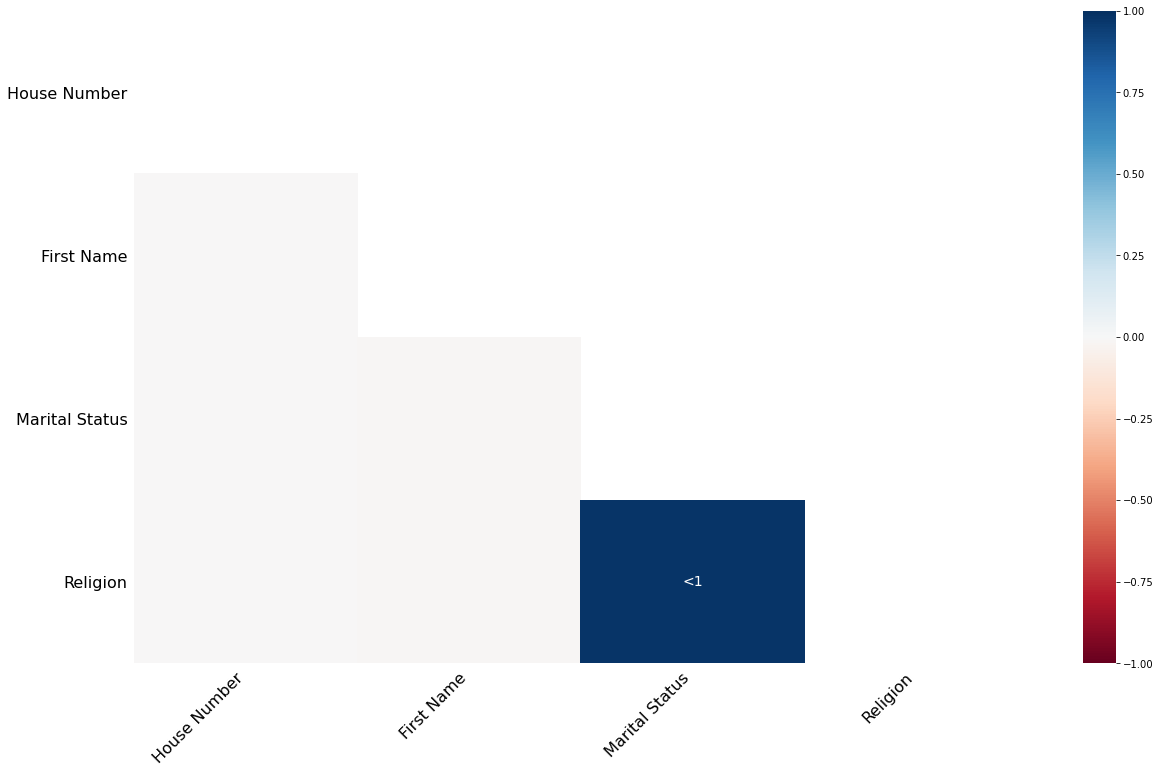

In [8]:
msno.heatmap(Census_df)

<AxesSubplot:>

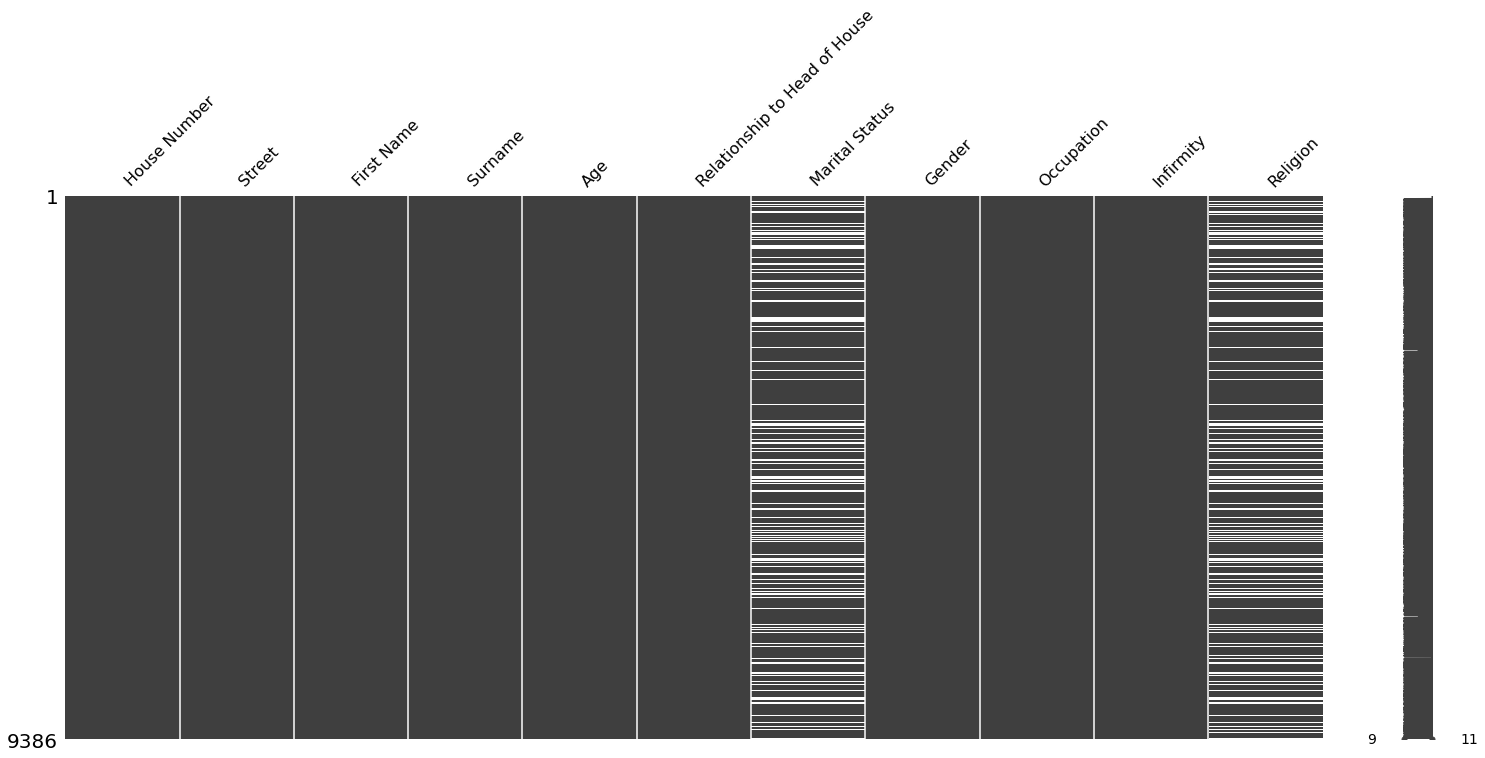

In [9]:
msno.matrix(Census_df)

In [10]:

!{sys.executable} -m pip install pandas-profiling

In [11]:
from pandas_profiling import ProfileReport

# Profile Report

In [12]:
profile = ProfileReport(Census_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
Census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 0 to 9385
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9385 non-null   object
 1   Street                         9386 non-null   object
 2   First Name                     9384 non-null   object
 3   Surname                        9386 non-null   object
 4   Age                            9386 non-null   object
 5   Relationship to Head of House  9386 non-null   object
 6   Marital Status                 7112 non-null   object
 7   Gender                         9386 non-null   object
 8   Occupation                     9386 non-null   object
 9   Infirmity                      9386 non-null   object
 10  Religion                       7059 non-null   object
dtypes: object(11)
memory usage: 806.7+ KB


In [14]:
Census_df.head()


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Hill Avenue,Eric,Farmer,70,Head,Divorced,Male,Retired Computer games developer,None,None
1,2,Hill Avenue,Suzanne,Flynn,45,Head,Married,Female,"Engineer, water",None,Christian
2,2,Hill Avenue,Oliver,Flynn,47,Husband,Married,Male,Technical sales engineer,None,Christian
3,3,Hill Avenue,Jake,Turner,21,Head,Married,Male,University Student,None,None
4,3,Hill Avenue,Linda,Turner,20,Wife,Married,Female,University Student,None,None


In [15]:
Census_df = Census_df.replace(r'^\s*$', np.NaN, regex=True)

# HOUSE NUMBER CLEANING

In [16]:
 Census_df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', nan,
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '13',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144

In [17]:
#Code to discover NaN value Location
Census_df.loc[pd.isna(Census_df['House Number']), :].index

Int64Index([18, 3094, 5000, 5001, 5002], dtype='int64')

In [18]:
Census_df.loc[3090:3099]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3090,11,Bradford Lane,Garry,Pearce,20,Head,Single,Male,University Student,None,Catholic
3091,12,Bradford Lane,Arthur,Middleton,18,Head,Single,Male,Student,None,NaN
3092,13,Bradford Lane,James,Edwards,39,Head,Divorced,Male,Corporate investment banker,None,Sikh
3093,14,Bradford Lane,Holly,Abbott,69,Head,Divorced,Female,Retired Land/geomatics surveyor,None,Christian
3094,NaN,Bradford Lane,Tony,Byrne,24,Head,Single,Male,Textile designer,None,Muslim
3095,15,Bradford Lane,Elizabeth,James,25,Partner,Single,Female,NaN,None,None
3096,16,Bradford Lane,Andrea,Henry,57,Head,Married,Female,Trade union research officer,None,Catholic
3097,16,Bradford Lane,Jake,Preston,61,Husband,Married,Male,Purchasing manager,None,Catholic
3098,17,Bradford Lane,Tracy,Scott,37,Head,Single,Female,"Scientist, marine",None,None
3099,18,Bradford Lane,Rebecca,Mason,26,Head,Single,Female,Unemployed,None,Christian


In [19]:
to_replace = {' ': '13', 'Five':'5', 'Six':'6' }
Census_df['House Number']= Census_df['House Number'].replace(to_replace)
Census_df['House Number']= Census_df['House Number'].fillna(14)

In [20]:
 Census_df["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 14,
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '13',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144'

In [21]:
Census_df.loc[3094]

House Number                                   14
Street                              Bradford Lane
First Name                                   Tony
Surname                                     Byrne
Age                                            24
Relationship to Head of House                Head
Marital Status                             Single
Gender                                       Male
Occupation                       Textile designer
Infirmity                                    None
Religion                                   Muslim
Name: 3094, dtype: object

In [22]:
Census_df['House Number']=Census_df['House Number'].astype(int)


In [23]:
 Census_df["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  13,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

# STREET CLEANING

In [24]:
 Census_df["Street"].unique()

array(['Hill Avenue', 'Humphreys Ridges', 'Coconut Forges', 'Hope Row',
       'Landings Light', 'Fleet Road', 'Turner Street', 'Stokes Plains',
       nan, 'Monument Pike', 'Stirling Land', 'Blueplace Road',
       'Butterfly Lane', 'Scott Road', 'Winter Road', 'Albert Plain',
       'Fraser Light', 'Bastille Coves', 'Embassy Courts',
       'Hancock Point', 'Elliott Avenue', 'Aberdeen Green',
       'London Avenue', 'Trent Street', 'Pilgrim Street',
       'Atkinson Drive', 'Ellis View', 'Dolphin Bridge', 'Edinburgh Lane',
       'Bradford Lane', 'Clark Shoals', 'Young Lane',
       'Edinburgh Mountain', 'Tegid Heights', 'Barton Plains',
       'Smith Flats', 'West Way', 'Unitedgain Avenue', 'Morris Parkways',
       'Monument Streets', 'November Avenue', 'Spring Street',
       'Stone Lane', 'Turnbull Hollow', 'Lee Avenue',
       'Birmingham Crossroad', 'Lisbonfix Drive', 'Appletree Views',
       'Banks Cliff', 'Pearson Gardens', 'Charity Avenue', 'James Knoll',
       'Butcher Dr

In [25]:
Census_df.loc[pd.isna(Census_df['Street']), :].index

Int64Index([878, 879, 880, 881], dtype='int64')

In [26]:
#Based on the information generated below, occupants of house number 70 live on Stokes Plains street.
#Will assign Stokes Plains Street as street name
Census_df.loc[868:888]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
868,67,Stokes Plains,Robin,Sullivan,0,Son,NaN,Male,Child,None,NaN
869,68,Stokes Plains,Molly,Brown,55,Head,Single,Female,Web designer,None,Christian
870,68,Stokes Plains,Lee,Brown,14,Son,NaN,Male,Student,None,NaN
871,68,Stokes Plains,Rachael,Brown,11,Daughter,NaN,Female,Student,None,NaN
872,68,Stokes Plains,Darren,Brown,7,Son,NaN,Male,Student,None,NaN
873,68,Stokes Plains,Kevin,Brown,4,Son,NaN,Male,Child,None,NaN
874,69,Stokes Plains,Geraldine,Richardson,51,Head,Married,Female,Chartered certified accountant,None,None
875,69,Stokes Plains,Jeremy,Richardson,57,Husband,Married,Male,"Geneticist, molecular",None,None
876,69,Stokes Plains,Patrick,Richardson,28,Son,Single,Male,Unemployed,None,None
877,69,Stokes Plains,Timothy,Richardson,25,Son,Single,Male,Midwife,None,None


In [27]:
Census_df['Street']= Census_df['Street'].fillna('Stokes Plains')

In [28]:
#Will assign Stokes Plains Street as street name
Census_df.loc[868:888]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
868,67,Stokes Plains,Robin,Sullivan,0,Son,NaN,Male,Child,None,NaN
869,68,Stokes Plains,Molly,Brown,55,Head,Single,Female,Web designer,None,Christian
870,68,Stokes Plains,Lee,Brown,14,Son,NaN,Male,Student,None,NaN
871,68,Stokes Plains,Rachael,Brown,11,Daughter,NaN,Female,Student,None,NaN
872,68,Stokes Plains,Darren,Brown,7,Son,NaN,Male,Student,None,NaN
873,68,Stokes Plains,Kevin,Brown,4,Son,NaN,Male,Child,None,NaN
874,69,Stokes Plains,Geraldine,Richardson,51,Head,Married,Female,Chartered certified accountant,None,None
875,69,Stokes Plains,Jeremy,Richardson,57,Husband,Married,Male,"Geneticist, molecular",None,None
876,69,Stokes Plains,Patrick,Richardson,28,Son,Single,Male,Unemployed,None,None
877,69,Stokes Plains,Timothy,Richardson,25,Son,Single,Male,Midwife,None,None


In [29]:
 Census_df["Street"].unique()

array(['Hill Avenue', 'Humphreys Ridges', 'Coconut Forges', 'Hope Row',
       'Landings Light', 'Fleet Road', 'Turner Street', 'Stokes Plains',
       'Monument Pike', 'Stirling Land', 'Blueplace Road',
       'Butterfly Lane', 'Scott Road', 'Winter Road', 'Albert Plain',
       'Fraser Light', 'Bastille Coves', 'Embassy Courts',
       'Hancock Point', 'Elliott Avenue', 'Aberdeen Green',
       'London Avenue', 'Trent Street', 'Pilgrim Street',
       'Atkinson Drive', 'Ellis View', 'Dolphin Bridge', 'Edinburgh Lane',
       'Bradford Lane', 'Clark Shoals', 'Young Lane',
       'Edinburgh Mountain', 'Tegid Heights', 'Barton Plains',
       'Smith Flats', 'West Way', 'Unitedgain Avenue', 'Morris Parkways',
       'Monument Streets', 'November Avenue', 'Spring Street',
       'Stone Lane', 'Turnbull Hollow', 'Lee Avenue',
       'Birmingham Crossroad', 'Lisbonfix Drive', 'Appletree Views',
       'Banks Cliff', 'Pearson Gardens', 'Charity Avenue', 'James Knoll',
       'Butcher Drive',

# First name cleaning

In [30]:
 Census_df["First Name"].unique()

array(['Eric', 'Suzanne', 'Oliver', 'Jake', 'Linda', 'Geoffrey',
       'Jonathan', 'Adam', 'Ross', 'Gemma', 'Phillip', 'Nicholas',
       'Kirsty', 'Henry', 'Leanne', 'Hannah', 'Alison', 'Lesley', 'Denis',
       'Kerry', 'Mary', 'Jasmine', 'Marie', 'Frederick', 'Naomi',
       'Caroline', 'Jodie', 'Marc', 'Natalie', 'Leonard', 'Jacob',
       'Martin', 'Garry', 'Damien', 'Mathew', 'Danielle', 'Tracey',
       'Conor', 'Gail', 'Liam', 'Stacey', 'Alice', 'Leah', 'Callum',
       'Marilyn', 'Cameron', 'Ryan', 'Pauline', 'Carol', 'June', 'Sean',
       'Shannon', 'Georgina', 'Joshua', 'Guy', 'Louise', 'Nicole',
       'Debra', 'Dominic', 'Kate', 'Marcus', 'Thomas', 'Nigel', 'Joan',
       'Gerard', 'Trevor', 'Grace', 'Stanley', 'Gary', 'Beth', 'Tony',
       'Clare', 'Vincent', 'Ashleigh', 'Jill', 'Rebecca', 'Annette',
       'Derek', 'William', 'Ann', 'Anna', 'Karl', 'Aimee', 'Mohamed',
       'Sandra', 'Jayne', 'Katy', 'Aaron', 'Pamela', 'Nathan',
       'Kimberley', 'Kenneth', 'Billy'

In [31]:
Census_df.loc[Census_df['First Name']=='B.']
Census_df.loc[Census_df['First Name']=='K']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8196,9,White Turnpike,K,Roberts,42,Head,Married,Female,Soil scientist,None,Catholic


In [32]:
#to give a uniform look, I added a dot after the initial of the first name of K Roberts house head of house 9 White Turnpike Street
to_replace = {'K': 'K.'}
Census_df['First Name']= Census_df['First Name'].replace(to_replace)


In [33]:
Census_df.loc[8190:8198]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8190,7,White Turnpike,Joan,Fowler,15,Daughter,NaN,Female,Student,None,NaN
8191,8,White Turnpike,Sandra,Singh,50,Head,Divorced,Female,Unemployed,None,Methodist
8192,8,White Turnpike,Marian,Singh,23,Daughter,Single,Female,"Production assistant, radio",None,Methodist
8193,8,White Turnpike,Nicholas,Singh,19,Son,Single,Male,University Student,None,Methodist
8194,8,White Turnpike,Alex,Singh,17,Son,NaN,Male,Student,None,NaN
8195,8,White Turnpike,Donna,Singh,16,Daughter,NaN,Female,Student,None,NaN
8196,9,White Turnpike,K.,Roberts,42,Head,Married,Female,Soil scientist,None,Catholic
8197,9,White Turnpike,Gregory,Roberts,46,Husband,Married,Male,Telecommunications researcher,None,Catholic
8198,9,White Turnpike,Kimberley,Roberts,9,Daughter,NaN,Female,Student,None,NaN


In [34]:
Census_df.loc[pd.isna(Census_df['Street']), :].index

Int64Index([], dtype='int64')

# Surname Cleaning

In [35]:
 Census_df["Surname"].unique()

array(['Farmer', 'Flynn', 'Turner', 'Foster', 'Phillips', 'Wheeler',
       'Cook', 'Chandler', 'Powell', 'Evans', 'Bell', 'Kennedy', 'Smith',
       'Woods', 'Davies', 'Richardson', 'Fraser', 'Ashton', 'Miller',
       'Wright', 'Thompson', 'Byrne', 'Williams', 'Morton', 'Sutton',
       'Franklin', 'King', 'Watson', 'Mistry', 'Lamb', 'Gardner',
       'Burgess', 'Butler', 'Jones', 'Anderson', 'Robertson', 'Potter',
       'Ali', 'Russell', 'Walker', 'Ellis', 'Campbell', 'Preston',
       'Moore', 'Bailey', 'Craig', 'Moore-Willis', 'Edwards', 'Griffin',
       'Nash', 'Begum', 'Khan', 'Henderson', 'Porter', 'Wilkinson',
       'Roberts', 'Payne', 'Harper', 'Burton', 'Johnson', 'Bartlett',
       'Lee', 'Page', 'Singh', 'Tomlinson', 'Clarke', 'Brown', 'Martin',
       'Barnes', 'Bradley', 'Bowen', 'Griffiths', 'Scott', 'Morrison',
       'Wilson', 'Read', 'Pollard', 'Stephenson', 'Jarvis',
       'Bolton-Jarvis', 'Kemp', 'Richards', 'Morris', 'McLean', 'Collins',
       'Kaur', 'Andrew

In [36]:
Census_df.loc[pd.isna(Census_df['Surname']), :].index

Int64Index([3972], dtype='int64')

In [37]:
Census_df.loc[Census_df['Surname']==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [38]:
Census_df.loc[3969:3975]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3969,15,Turnbull Hollow,Neil,Smith,35,Husband,Married,Male,"Administrator, education",None,None
3970,15,Turnbull Hollow,Emily,Smith,11,Daughter,NaN,Female,Student,None,NaN
3971,16,Turnbull Hollow,Victoria,Mann,55,Head,Married,Female,Solicitor,None,Christian
3972,16,Turnbull Hollow,Leonard,NaN,61,Husband,Married,Male,Clinical research associate,None,Christian
3973,16,Turnbull Hollow,Linda,Mann,13,Daughter,NaN,Female,Student,None,NaN
3974,16,Turnbull Hollow,Kate,Mann,5,Daughter,NaN,Female,Student,None,NaN
3975,16,Turnbull Hollow,Rita,Mann,3,Adopted Daughter,NaN,Female,Child,None,NaN


In [39]:
Census_df['Surname']= Census_df['Surname'].fillna('Mann')

In [40]:
Census_df.loc[3969:3975]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3969,15,Turnbull Hollow,Neil,Smith,35,Husband,Married,Male,"Administrator, education",None,None
3970,15,Turnbull Hollow,Emily,Smith,11,Daughter,NaN,Female,Student,None,NaN
3971,16,Turnbull Hollow,Victoria,Mann,55,Head,Married,Female,Solicitor,None,Christian
3972,16,Turnbull Hollow,Leonard,Mann,61,Husband,Married,Male,Clinical research associate,None,Christian
3973,16,Turnbull Hollow,Linda,Mann,13,Daughter,NaN,Female,Student,None,NaN
3974,16,Turnbull Hollow,Kate,Mann,5,Daughter,NaN,Female,Student,None,NaN
3975,16,Turnbull Hollow,Rita,Mann,3,Adopted Daughter,NaN,Female,Child,None,NaN


# AGE CLEANING

In [41]:
 #Data from Age critical for finding out if a the government should invest in old age care
 #Data from Age critical for finding out if a the government should invest in employment and training
#Data from Age critical for finding out if a the government should invest in schooling spend
Census_df["Age"].unique()

array(['70', '45', '47', '21', '20', '57', 'Seventy Three', '52', '62',
       '71', '73', '44', '30', '64', '42', '35', '31', '41', '88', '83',
       '74', '68', '63', '55', '28', '26', '59', '48', '54', '67', '66',
       '61', '29', '39', '65', '17', '27', '82', '78', '40', '33', '14',
       '4', '34', '36', '8', '7', '43', '23', '12', '50', '13', '10', '5',
       '1', '53', '56', '58', '11', '76', '81', '37', '2', '32', '25',
       '3', '46', '18', '15', '38', '19', '51', '6', '9', '87', '24', '0',
       '16', '60', '22', '92', '94', '49', '69', '64.28681271',
       '66.28681271', '77', '80', '90', '75', '100', '98', '84', '85',
       'Nine', '72', '79', '86', '99', '89', '103', '95', '105', '104',
       '-1', '96', '91', '0.5', '77.4', '97', nan, 'Seven', '7.2', '102',
       '88.5', '86.2', '106', '93', '2021', '69.76119036', '77.76119036',
       '3.2'], dtype=object)

In [42]:
to_replace = {'Seventy Three' : '73', '64.28681271':'64', '66.28681271':'66', 'Nine':'9', '-1': '0', '0.5':'0', '77.4':'77','Seven':'7', '7.2': '7',
             '88.5':'88','86.2':'86', '69.76119036':'69', '77.76119036':'77', '3.2':'3', '2021':'21'}
Census_df['Age']= Census_df['Age'].replace(to_replace)

In [43]:
Census_df['Age']= Census_df['Age'].fillna(0)

In [44]:
Census_df['Age']=Census_df['Age'].astype(int)

In [45]:
Census_df.loc[Census_df['Age']=='-1']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [46]:
Census_df.loc[pd.isna(Census_df['Age']), :].index

Int64Index([], dtype='int64')

In [47]:
Census_df.loc[8182:8185]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8182,6,White Turnpike,Lesley,Ellis,50,Head,Single,Female,Printmaker,None,Catholic
8183,6,White Turnpike,Keith,Jones,21,None,Single,Male,Fine artist,None,Christian
8184,6,White Turnpike,Lisa,Jones,31,None,Single,Female,Structural engineer,None,Christian
8185,6,White Turnpike,Liam,Marshall,28,None,Single,Male,Occupational psychologist,None,Catholic


In [48]:
 Census_df["Age"].unique()

array([ 70,  45,  47,  21,  20,  57,  73,  52,  62,  71,  44,  30,  64,
        42,  35,  31,  41,  88,  83,  74,  68,  63,  55,  28,  26,  59,
        48,  54,  67,  66,  61,  29,  39,  65,  17,  27,  82,  78,  40,
        33,  14,   4,  34,  36,   8,   7,  43,  23,  12,  50,  13,  10,
         5,   1,  53,  56,  58,  11,  76,  81,  37,   2,  32,  25,   3,
        46,  18,  15,  38,  19,  51,   6,   9,  87,  24,   0,  16,  60,
        22,  92,  94,  49,  69,  77,  80,  90,  75, 100,  98,  84,  85,
        72,  79,  86,  99,  89, 103,  95, 105, 104,  96,  91,  97, 102,
       106,  93])

# RELATIONSHIP TO HEAD OF HOUSE CLEANING

In [49]:
 Census_df['Relationship to Head of House'].unique()

array(['Head', 'Husband', 'Wife', 'Lodger', 'Son', 'Daughter', 'Partner',
       'Visitor', 'None', 'Adopted Son', 'Neice', 'Granddaughter',
       'Adopted Daughter', 'Step-Daughter', 'Step-Son', 'Grandson',
       'Sibling', 'Nephew', 'Cousin', 'Son-in-law',
       'Adopted Granddaughter', 'Adopted Grandson', 'HEAD',
       'Daughter-in-law', nan, 'SON'], dtype=object)

In [50]:
to_replace = {'HEAD':'Head', 'SON':'Son'}
Census_df['Relationship to Head of House']= Census_df['Relationship to Head of House'].replace(to_replace)

In [51]:
Visitors = Census_df.loc[Census_df['Relationship to Head of House']=='Visitor']
Visitors.describe()

,House Number,Age
count,18.000000,18.000000
mean,61.722222,39.777778
std,79.443510,13.636265
min,1.000000,20.000000
25%,3.750000,28.750000
50%,18.500000,35.500000
75%,100.500000,49.500000
max,226.000000,63.000000


In [52]:
Lodgers = Census_df.loc[Census_df['Relationship to Head of House']=='Lodger']
Lodgers.describe()

,House Number,Age
count,278.000000,278.000000
mean,50.151079,40.471223
std,60.026338,13.735678
min,1.000000,18.000000
25%,9.000000,28.000000
50%,22.000000,40.000000
75%,66.750000,51.750000
max,231.000000,64.000000


In [53]:
Census_df.loc[5450:5458]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5450,71,Butcher Drive,Kirsty,Warren,25,Head,Married,Female,Proofreader,None,None
5451,71,Butcher Drive,Glenn,Warren,26,Husband,Married,Male,Building surveyor,None,None
5452,72,Butcher Drive,Eileen,Pugh,71,Head,Married,Female,Retired Energy engineer,None,None
5453,72,Butcher Drive,Callum,Pugh,73,NaN,Married,Male,Retired Publishing rights manager,None,None
5454,72,Butcher Drive,Martyn,Pugh,36,Son,Divorced,Male,Outdoor activities/education manager,None,None
5455,72,Butcher Drive,Gary,Roberts,33,Son,Single,Male,Sports development officer,None,None
5456,72,Butcher Drive,Russell,Roberts,28,Son,Single,Male,Podiatrist,None,None
5457,73,Butcher Drive,Alison,Jones,30,Head,Single,Female,"Loss adjuster, chartered",None,Christian
5458,73,Butcher Drive,Cameron,Smith,38,None,Single,Male,Materials engineer,None,Christian


In [54]:
#Changed NaN value to 'husband' based on the fact that he is married and lives in the same house to the head of house 
#From the row it is easy to tell that Callum Pugh is the husband of Eileen Pugh
Census_df['Relationship to Head of House']= Census_df['Relationship to Head of House'].fillna('Husband')

# Marital Status Cleaning

In [55]:
#Data from marital status, critical for finding out if a high density housing should be built by the local government 
#Data from marital status,   critical for finding out if a the government should invest in schooling
Census_df["Marital Status"].unique()

array(['Divorced', 'Married', 'Widowed', 'Single', nan, 'DIVORCED',
       'SINGLE'], dtype=object)

In [56]:
to_replace = {'DIVORCED': 'Divorced', 'SINGLE': 'Single'}
Census_df['Marital Status'] = Census_df['Marital Status'].replace(to_replace)

In [57]:
Census_df.loc[pd.isna(Census_df['Marital Status']), :].index

Int64Index([  53,   62,   65,   68,   69,   70,   74,   79,   80,   81,
            ...
            9366, 9367, 9368, 9369, 9373, 9374, 9376, 9377, 9378, 9379],
           dtype='int64', length=2277)

In [58]:
Census_df.loc[53:82]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
53,1,Humphreys Ridges,Carol,Ashton,17,Daughter,NaN,Female,Student,None,NaN
54,2,Humphreys Ridges,June,Butler,27,Head,Single,Female,"Nurse, children's",None,Methodist
55,2,Humphreys Ridges,Sean,Jones,26,Partner,Single,Male,Building services engineer,None,Methodist
56,2,Humphreys Ridges,Shannon,Anderson,20,Visitor,Single,Female,University Student,None,None
57,2,Humphreys Ridges,Gemma,Robertson,30,Lodger,Single,Female,Unemployed,Physical Disability,None
58,3,Humphreys Ridges,Georgina,Potter,82,Head,Married,Female,Retired Consulting civil engineer,None,Christian
59,3,Humphreys Ridges,Joshua,Potter,78,Husband,Married,Male,Retired Industrial buyer,None,Christian
60,3,Humphreys Ridges,Guy,Potter,40,Son,Single,Male,Unemployed,None,None
61,4,Humphreys Ridges,Louise,Ali,33,Head,Single,Female,Unemployed,None,None
62,4,Humphreys Ridges,Nicole,Russell,14,Daughter,NaN,Female,Student,None,NaN


In [59]:
#from the data provided one can see that majority of the NAN values applies to children
#I have assigned NAN as NA(Not applicable) for this column
Census_df['Marital Status']= Census_df['Marital Status'].fillna('NA')

In [60]:
Census_df['Marital Status'].unique()

array(['Divorced', 'Married', 'Widowed', 'Single', 'NA'], dtype=object)

In [61]:
Divorcees = Census_df.loc[Census_df['Marital Status']=='Divorced']

In [62]:
Divorcees

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Hill Avenue,Eric,Farmer,70,Head,Divorced,Male,Retired Computer games developer,None,None
5,4,Hill Avenue,Geoffrey,Foster,57,Head,Divorced,Male,Prison officer,None,Christian
19,14,Hill Avenue,Denis,Woods,88,Head,Divorced,Male,Retired Learning mentor,None,Christian
21,16,Hill Avenue,Mary,Richardson,62,Head,Divorced,Female,Animal nutritionist,None,None
29,21,Hill Avenue,Hannah,Miller,26,Daughter,Divorced,Female,"Nurse, mental health",None,None
...,...,...,...,...,...,...,...,...,...,...,...
9327,1,Mason Bastion,Grace,Thomson,42,Lodger,Divorced,Female,Editorial assistant,None,None
9341,1,Threadneedle Bastion,Nicholas,Lloyd,52,Lodger,Divorced,Male,"Civil engineer, contracting",None,None
9365,1,Hayes Commune,Geraldine,Allen,36,Head,Divorced,Female,General practice doctor,None,Methodist
9372,1,Duchess Villa,Julia,Johnson,21,Daughter,Divorced,Female,University Student,None,Sikh


# Gender Cleaning

In [63]:
 Census_df["Gender"].unique()

array(['Male', 'Female', nan, 'male', 'M', 'F', 'MALE', 'FEMALE',
       'F-emale', 'Fe-male', 'Mal-e', 'Ma-le', 'F.'], dtype=object)

In [64]:
to_replace = {'MALE': 'Male', ' ':'Female', 'male':'Male', 'M':'Male', 'F':'Female', 'FEMALE':'Female',
       'F-emale':'Female', 'Fe-male':'Female', 'Mal-e':'Male', 'Ma-le': 'Male', 'F.':'Female' }
Census_df['Gender']= Census_df['Gender'].replace(to_replace)

In [65]:
 Census_df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [66]:
Census_df.loc[pd.isna(Census_df['Gender']), :].index

Int64Index([307], dtype='int64')

In [67]:
#based on the information here the NAN value applies to 'daughter' meaning she is female
#So value will be changed to female
Census_df.loc[302:310]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
302,49,Hope Row,Declan,Kelly-Parker,0,Son,NA,Male,Child,None,NaN
303,49,Hope Row,Ross,Ward,30,Lodger,Single,Male,Osteopath,None,Sikh
304,50,Hope Row,Bethan,Smith,62,Head,Divorced,Female,"Psychologist, educational",None,Christian
305,50,Hope Row,Thomas,Smith,39,Son,Single,Male,Science writer,None,None
306,51,Hope Row,Heather,Wright,45,Head,Divorced,Female,Radiation protection practitioner,None,None
307,51,Hope Row,Geraldine,Wright,10,Daughter,NA,NaN,Student,None,NaN
308,51,Hope Row,Mitchell,Wright,7,Son,NA,Male,Student,None,NaN
309,51,Hope Row,Rosemary,Wright,5,Daughter,NA,Female,Student,None,NaN
310,52,Hope Row,Yvonne,Chadwick,94,Head,Widowed,Female,Retired Town planner,None,None


In [68]:
Census_df['Gender']= Census_df['Gender'].fillna('Female')

In [69]:
 Census_df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [70]:
Census_df.loc[Census_df['Gender']=='Mal-e']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


# Occupation Cleaning

In [71]:
#Data from occupation, critical for finding out if a train station should be built by the local government 
#Data from Age critical for finding out if a the government should invest in employment and training
Census_df['Occupation'].unique()

array(['Retired Computer games developer', 'Engineer, water',
       'Technical sales engineer', ...,
       'Retired Civil Service fast streamer', 'Retired Medical physicist',
       'Uni Student'], dtype=object)

In [72]:
to_replace = {'Uni Student': 'University Student' }
Census_df['Occupation']= Census_df['Occupation'].replace(to_replace)

In [73]:
Census_df['Occupation'] 

0       Retired Computer games developer
1                        Engineer, water
2               Technical sales engineer
3                     University Student
4                     University Student
                      ...               
9381                  University Student
9382                          Unemployed
9383                    Doctor, hospital
9384           Insurance account manager
9385       Designer, television/film set
Name: Occupation, Length: 9386, dtype: object

In [74]:
for i in Census_df['Occupation']:
    print (i)

Retired Computer games developer
Engineer, water
Technical sales engineer
University Student
University Student
Prison officer
Retired Air broker
Research scientist (medical)
Video editor
Retired Chartered certified accountant
Retired Geoscientist
Metallurgist
Nature conservation officer
Sports development officer
Estate agent
Ambulance person
Air traffic controller
Administrator, education
Producer, television/film/video
Retired Learning mentor
Retired Glass blower/designer
Animal nutritionist
Retired Radiographer, therapeutic
Telecommunications researcher
Retired Chief Marketing Officer
Retail manager
Retired Housing manager/officer
Unemployed
Curator
Nurse, mental health
Arts administrator
Microbiologist
Maintenance engineer
Agricultural engineer
Loss adjuster, chartered
Secondary school teacher
Event organiser
Trade union research officer
Psychologist, prison and probation services
Bonds trader
Journalist, magazine
Scientific laboratory technician
Advice worker
Radio broadcast assi

Race relations officer
Student
Student
Student
Health and safety inspector
Medical technical officer
Student
Oncologist
Conservation officer, historic buildings
Oceanographer
Museum/gallery conservator
Student
Student
Unemployed
Museum/gallery conservator
Outdoor activities/education manager
Veterinary surgeon
Emergency planning/management officer
Chief Financial Officer
Surveyor, minerals
Veterinary surgeon
Historic buildings inspector/conservation officer
Student
Student
Designer, blown glass/stained glass
Probation officer
Therapist, art
Water quality scientist
Pharmacist, community
Minerals surveyor
Child
Child
Community pharmacist
IT sales professional
Student
Dietitian
Nurse, adult
Freight forwarder
Lighting technician, broadcasting/film/video
Engineer, agricultural
Retired Engineer, site
Retired Engineer, mining
Data processing manager
Scientist, research (life sciences)
Student
Student
Mechanical engineer
Dramatherapist
Student
Child
Unemployed
Planning and development surveyor

Student
Student
Student
Civil engineer, consulting
Immunologist
Amenity horticulturist
Student
Multimedia specialist
Holiday representative
Student
Student
Child
Unemployed
Hydrographic surveyor
Student
Unemployed
IT trainer
Multimedia specialist
Biochemist, clinical
Pharmacologist
Editor, film/video
Dentist
Emergency planning/management officer
Designer, jewellery
Animal technologist
Actor
Surveyor, hydrographic
Retired Clinical research associate
Engineer, building services
Engineer, maintenance
English as a second language teacher
Retired Administrator, charities/voluntary organisations
Retired Engineer, civil (contracting)
University Student
University Student
PhD Student
University Student
University Student
Computer games developer
Teacher, adult education
Hydrogeologist
Licensed conveyancer
Intelligence analyst
Student
Student
Student
Unemployed
Student
Retired Engineer, water
Retired Media planner
IT consultant
Unemployed
Programmer, multimedia
Television/film/video producer
Da

Child
Chief Strategy Officer
Student
Student
Child
Retired Naval architect
Retired Health promotion specialist
University Student
University Student
Student
Commercial art gallery manager
Mudlogger
Armed forces logistics/support/administrative officer
Land
Academic librarian
Horticultural consultant
Control and instrumentation engineer
Student
Student
Student
Air cabin crew
Energy engineer
University Student
Psychotherapist, child
Medical laboratory scientific officer
Unemployed
Equality and diversity officer
Student
Chemist, analytical
Clinical research associate
Scientist, research (maths)
Higher education lecturer
Engineer, manufacturing
Student
IT sales professional
Student
Student
Student
Student
Child
Child
Unemployed
Medical illustrator
Student
Student
Retired Radio producer
Retired Production designer, theatre/television/film
Education officer, museum
Unemployed
Building services engineer
Student
Unemployed
IT consultant
Engineer, energy
Clinical research associate
Research off

Embryologist, clinical
Chartered accountant
Retired Chartered certified accountant
Unemployed
Therapist, art
Student
Student
Student
Administrator, charities/voluntary organisations
Archaeologist
University Student
Make
Print production planner
Child
Retail buyer
Osteopath
Nutritional therapist
Student
Child
Child
Unemployed
Retired English as a second language teacher
Exhibition designer
Health service manager
Therapist, horticultural
Equities trader
Copy
Air traffic controller
Music therapist
Unemployed
Agricultural consultant
Student
Student
Unemployed
Student
Student
Student
Risk manager
Editor, film/video
Unemployed
Child
Cytogeneticist
International aid/development worker
Air traffic controller
Midwife
University Student
University Student
Media buyer
University Student
Financial manager
Magazine journalist
Psychologist, counselling
IT technical support officer
Student
Student
Child
Child
Health and safety adviser
Agricultural engineer
University Student
Student
Student
Child
Eng

Production manager
IT sales professional
Student
Surveyor, commercial/residential
Engineer, structural
Student
Pharmacist, hospital
University Student
Student
Jewellery designer
Metallurgist
Student
Student
Student
Armed forces operational officer
Secondary school teacher
Student
Student
Student
Programmer, multimedia
Teacher, adult education
Psycho-logist, forensic
Research officer, trade union
Designer, blown glass/stained glass
Retired Scientist, clinical (histocompatibility and immunogenetics)
Retired Information systems manager
Retired Geologist, engineering
University Student
Ship broker
Child
Child
Broadcast presenter
Osteopath
Child
Child
Senior tax professional/tax inspector
Engineer, biomedical
Chief Executive Officer
Unemployed
Higher education lecturer
Higher education careers adviser
Teacher, music
Student
Child
Chief Strategy Officer
Barista
Student
Student
Ergonomist
Writer
Unemployed
Science writer
Investment banker, operational
Student
Designer, interior/spatial
Studen

Television production assistant
Architect
Student
Jewellery designer
Audiological scientist
Psychologist, prison and probation services
University Student
Student
Commercial/residential surveyor
Print production planner
Retired Magazine features editor
Retired Health promotion specialist
Lobbyist
Dietitian
Unemployed
Education officer, environmental
Air traffic controller
Engineer, chemical
Solicitor
Oceanographer
Fine artist
Radio broadcast assistant
Retired Water quality scientist
Retired Personal assistant
University Student
University Student
University Student
University Student
University Student
Community pharmacist
Financial controller
Intelligence analyst
Student
Student
Student
Radiographer, therapeutic
Retired Field trials officer
Scientist, water quality
Retired Artist
Retired Public relations officer
Learning disability nurse
Production engineer
University Student
Student
Administrator, arts
Child
Retail banker
Research officer, political party
Student
Student
Student
Corp

Engineer, civil (contracting)
Geophysicist/field seismologist
Pensions consultant
Legal executive
Sports development officer
Student
Student
Land
Student
Herbalist
Heritage manager
Student
Retired Advertising account executive
Retired Clinical scientist, histocompatibility and immunogenetics
Retired Sports development officer
Early years teacher
Housing manager/officer
Phytotherapist
Theatre stage manager
Drilling engineer
Dealer
Product manager
Field seismologist
Unemployed
Quarry manager
Student
Retired Oceanographer
Retired International aid/development worker
Unemployed
Unemployed
Student
Student
Research scientist (physical sciences)
Unemployed
Student
Hospital pharmacist
Gaffer
Student
Airline pilot
Biochemist, clinical
Air cabin crew
Civil engineer, consulting
Lecturer, higher education
Scientist, water quality
Student
Child
Quantity surveyor
Student
Student
Child
Catering manager
Solicitor
Student
Unemployed
Animator
Unemployed
Automotive engineer
Student
Student
Journalist, ma

Health promotion specialist
Barrister
Solicitor, Scotland
Teacher, secondary school
Teacher, English as a foreign language
Call centre manager
Student
Student
Child
Research scientist (maths)
Chartered certified accountant
Student
Student
Child
Retired Restaurant manager, fast food
Retired Company secretary
Scientist, research (maths)
Agricultural engineer
Curator
Unemployed
Communications engineer
Dramatherapist
Acupuncturist
Medical sales representative
Engineer, automotive
Counselling psychologist
Environmental education officer
Animal technologist
Psychiatric nurse
Forensic psychologist
Training and development officer
Trading standards officer
Event organiser
Student
Unemployed
Child
Educational psychologist
Designer, jewellery
Print production planner
Advice worker
Operations geologist
Student
Student
Student
Student
Student
Child
Child
Child
Engineer, site
Embryologist, clinical
Civil Service fast streamer
Aid worker
Museum/gallery curator
Systems analyst
Historic buildings insp

Retired Geographical information systems officer
Doctor, general practice
Translator
Lobbyist
Student
Retired Chartered management accountant
Industrial buyer
Retired Human resources officer
Retired Development worker, international aid
Unemployed
Magazine features editor
Research scientist (life sciences)
Librarian, academic
Retired Wellsite geologist
Retired Engineer, drilling
University Student
Student
Statistician
Designer, multimedia
Computer games developer
Student
Student
Accountant, chartered
Architectural technologist
Child
Child
Child
Child
Retired Chief Marketing Officer
Consulting civil engineer
Designer, furniture
Solicitor
Student
Student
Student
Retired Environmental education officer
Sales promotion account executive
Editor, magazine features
Orthoptist
Logistics and distribution manager
Industrial/product designer
Child psychotherapist
Doctor, general practice
Solicitor
Child
Child
Engineer, energy
Teacher, English as a foreign language
Therapist, horticultural
Social 

Psychotherapist, dance movement
Student
Furniture designer
Student
Student
Student
Homeopath
Medical illustrator
Financial adviser
Environmental consultant
Unemployed
Doctor, hospital
Student
Accounting technician
Commissioning editor
Student
Child
Unemployed
Environmental health practitioner
Student
Doctor, hospital
Chartered public finance accountant
Unemployed
Web designer
Economist
Copy
Psychologist, occupational
Engineer, agricultural
Student
IT sales professional
Systems analyst
Student
Student
Toxicologist
Sales professional, IT
Commercial art gallery manager
TEFL teacher
Tax adviser
Student
Unemployed
Student
Student
Financial controller
Chartered management accountant
Theatre director
University Student
Television camera operator
Herbalist
Student
Waste management officer
Multimedia programmer
Student
Unemployed
Student
Student
Student
Student
Comptroller
Landscape architect
Student
Unemployed
Photographer
Retired Administrator
Retired Environmental consultant
Programmer, appl

In [75]:
Census_df.loc[Census_df['Occupation']=='Child']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
65,5,Humphreys Ridges,Kate,Walker,4,Daughter,NA,Female,Child,Physical Disability,NaN
70,6,Humphreys Ridges,Nigel,Ellis,4,Son,NA,Male,Child,None,NaN
84,10,Humphreys Ridges,Rebecca,Bailey,1,Daughter,NA,Female,Child,None,NaN
105,8,Coconut Forges,Kenneth,Wilkinson,2,Son,NA,Male,Child,None,NaN
118,2,Hope Row,Linda,Payne,3,Daughter,NA,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9346,1,Farmer Rectory,Bernard,Arnold,2,Son,NA,Male,Child,None,NaN
9347,1,Farmer Rectory,Stewart,Arnold,0,Son,NA,Male,Child,None,NaN
9352,1,Goldfinch Fort,Gerard,Kelly,2,Son,NA,Male,Child,None,NaN
9362,1,Norwich Cabin,Suzanne,Khan,1,Daughter,NA,Female,Child,None,NaN


In [76]:
Census_df.loc[pd.isna(Census_df['Occupation']), :].index

Int64Index([3095], dtype='int64')

In [77]:
Census_df[3092:3098]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3092,13,Bradford Lane,James,Edwards,39,Head,Divorced,Male,Corporate investment banker,None,Sikh
3093,14,Bradford Lane,Holly,Abbott,69,Head,Divorced,Female,Retired Land/geomatics surveyor,None,Christian
3094,14,Bradford Lane,Tony,Byrne,24,Head,Single,Male,Textile designer,None,Muslim
3095,15,Bradford Lane,Elizabeth,James,25,Partner,Single,Female,NaN,None,None
3096,16,Bradford Lane,Andrea,Henry,57,Head,Married,Female,Trade union research officer,None,Catholic
3097,16,Bradford Lane,Jake,Preston,61,Husband,Married,Male,Purchasing manager,None,Catholic


In [78]:
Census_df['Occupation'] = Census_df['Occupation'].fillna('Unemployed')

In [79]:
Census_df['Occupation']

0       Retired Computer games developer
1                        Engineer, water
2               Technical sales engineer
3                     University Student
4                     University Student
                      ...               
9381                  University Student
9382                          Unemployed
9383                    Doctor, hospital
9384           Insurance account manager
9385       Designer, television/film set
Name: Occupation, Length: 9386, dtype: object

# Infirmity Cleaning

In [80]:
 #Data from infirmity, critical for finding out if an emergency medical building should be built by the local government 
Census_df['Infirmity'].unique()

array(['None', 'Physical Disability', 'Unknown Infection', nan, 'Deaf',
       'Disabled', 'Blind', 'Mental Disability'], dtype=object)

In [81]:
Census_df['Infirmity'] = Census_df['Infirmity'].fillna('None')

In [82]:
Census_df['Infirmity'].unique()

array(['None', 'Physical Disability', 'Unknown Infection', 'Deaf',
       'Disabled', 'Blind', 'Mental Disability'], dtype=object)

# Religion Cleaning

In [83]:
 #Data from religion, critical for finding out if a religious building should be built by the local government
Census_df["Religion"].unique()

array(['None', 'Christian', 'Muslim', 'Methodist', 'Catholic', 'Jewish',
       nan, 'Sikh', 'Nope', 'Undecided', 'Bahai', 'Private', 'Baptist'],
      dtype=object)

In [84]:
Census_df.loc[Census_df['Religion']=='Methodist']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
15,11,Hill Avenue,Hannah,Kennedy,42,Lodger,Single,Female,Ambulance person,None,Methodist
16,12,Hill Avenue,Phillip,Wheeler,35,Head,Married,Male,Air traffic controller,None,Methodist
17,12,Hill Avenue,Alison,Wheeler,31,Wife,Married,Female,"Administrator, education",None,Methodist
20,15,Hill Avenue,Kerry,Davies,83,Head,Widowed,Female,Retired Glass blower/designer,None,Methodist
54,2,Humphreys Ridges,June,Butler,27,Head,Single,Female,"Nurse, children's",None,Methodist
...,...,...,...,...,...,...,...,...,...,...,...
9269,14,Smith Lane,Jay,Morgan,26,None,Single,Male,Warehouse manager,None,Methodist
9287,20,Smith Lane,Jade,Owen,82,Head,Married,Female,Retired Land/geomatics surveyor,None,Methodist
9288,20,Smith Lane,Vincent,Owen,85,Husband,Married,Male,Retired Chief Marketing Officer,None,Methodist
9351,1,Goldfinch Fort,Dawn,Kelly,27,Head,Single,Female,Production manager,None,Methodist


In [85]:
Census_df.loc[Census_df['Religion']=='Catholic']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,26,Hill Avenue,Damien,Morton,47,Head,Divorced,Male,Event organiser,None,Catholic
42,30,Hill Avenue,Kirsty,Watson,57,Head,Single,Female,Advice worker,None,Catholic
47,34,Hill Avenue,Leah,Gardner,39,Head,Single,Female,Local government officer,None,Catholic
48,34,Hill Avenue,Callum,Burgess,41,Partner,Single,Male,"Radiographer, diagnostic",None,Catholic
71,7,Humphreys Ridges,Joan,Campbell,43,Head,Married,Female,Advice worker,None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
9353,1,Goldfinch Fort,Naomi,Barker,49,Cousin,Single,Female,Best boy,None,Catholic
9355,1,Goldfinch Fort,Charlie,Marshall,40,Lodger,Single,Male,Unemployed,None,Catholic
9357,1,England Windmill,Lauren,Alexander,44,Head,Single,Female,Field seismologist,None,Catholic
9358,1,England Windmill,Connor,James,46,Partner,Single,Male,Unemployed,None,Catholic


In [86]:
Census_df.loc[Census_df['Religion']=='Baptist']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8373,3,Steel Road,Kelly,Watts,42,Head,Married,Female,Theme park manager,None,Baptist
8374,3,Steel Road,Roger,Watts,44,Husband,Married,Male,Careers adviser,None,Baptist
8375,3,Steel Road,Dominic,Watts,19,Son,Single,Male,University Student,None,Baptist


In [87]:
Census_df.loc[Census_df['Religion']=='Christian']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,2,Hill Avenue,Suzanne,Flynn,45,Head,Married,Female,"Engineer, water",None,Christian
2,2,Hill Avenue,Oliver,Flynn,47,Husband,Married,Male,Technical sales engineer,None,Christian
5,4,Hill Avenue,Geoffrey,Foster,57,Head,Divorced,Male,Prison officer,None,Christian
7,6,Hill Avenue,Adam,Wheeler,52,Head,Single,Male,Research scientist (medical),None,Christian
8,7,Hill Avenue,Ross,Cook,62,Head,Single,Male,Video editor,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
9354,1,Goldfinch Fort,Jane,Nicholson-DeClair,24,Lodger,Single,Female,Television camera operator,None,Christian
9356,1,July House,Leon,Roberts,58,Head,Single,Male,Ranger/warden,None,Christian
9364,1,Norwich Cabin,Kirsty,Barber,45,Sibling,Single,Female,Physiotherapist,None,Christian
9382,1,Glasgow Ranch,Sara,Price,55,None,Single,Female,Unemployed,None,Christian


In [88]:
Census_df.loc[Census_df['Religion']=='Private']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6415,133,Magpieplace Street,Ross,Carter,54,Head,Divorced,Male,Newspaper journalist,None,Private


In [89]:
to_replace = {'Nope': 'None', 'Undecided': 'None'}
Census_df['Religion']= Census_df['Religion'].replace(to_replace)

In [90]:
Census_df['Religion'] = Census_df['Religion'].fillna('None')

In [91]:
Census_df["Religion"].unique()

array(['None', 'Christian', 'Muslim', 'Methodist', 'Catholic', 'Jewish',
       'Sikh', 'Bahai', 'Private', 'Baptist'], dtype=object)

In [92]:
Census_df.loc[pd.isna(Census_df['Religion']), :].index

Int64Index([], dtype='int64')

# DATA VISUSLISATION AND STATISTICS

Text(0.5, 1.0, 'Religion vs Age')

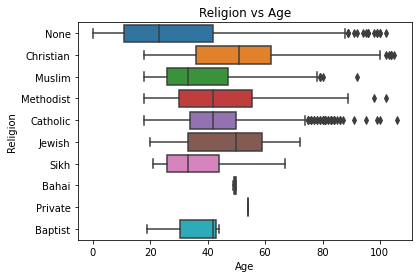

In [93]:
Rel_Age= sns.boxplot(data= Census_df, x= 'Age', y = 'Religion')
plt.savefig('Rel_Age.png', dpi=300)
plt.title('Religion vs Age')

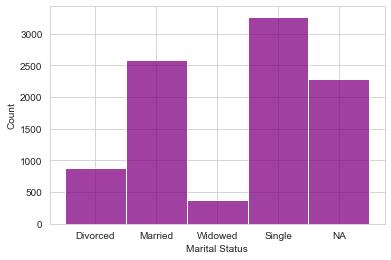

In [94]:
sns.set_style("whitegrid")
sns.histplot(data= Census_df, x= 'Marital Status', color="purple", bins=50)
sns.set(rc={"figure.figsize":(12, 10)})
plt.savefig('Maritalstatus.png', dpi=100)

In [95]:
Census_df.groupby("Marital Status")['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital Status,,,,,,,,
Divorced,879.0,42.279863,16.536050,15.0,29.0,40.0,53.0,105.0
Married,2580.0,50.101550,16.236229,0.0,39.0,48.0,61.0,106.0
NA,2277.0,9.183136,5.111955,0.0,5.0,9.0,14.0,51.0
Single,3267.0,37.311295,14.118651,3.0,25.0,35.0,47.0,102.0
Widowed,383.0,66.396867,18.570347,18.0,65.0,71.0,77.0,104.0


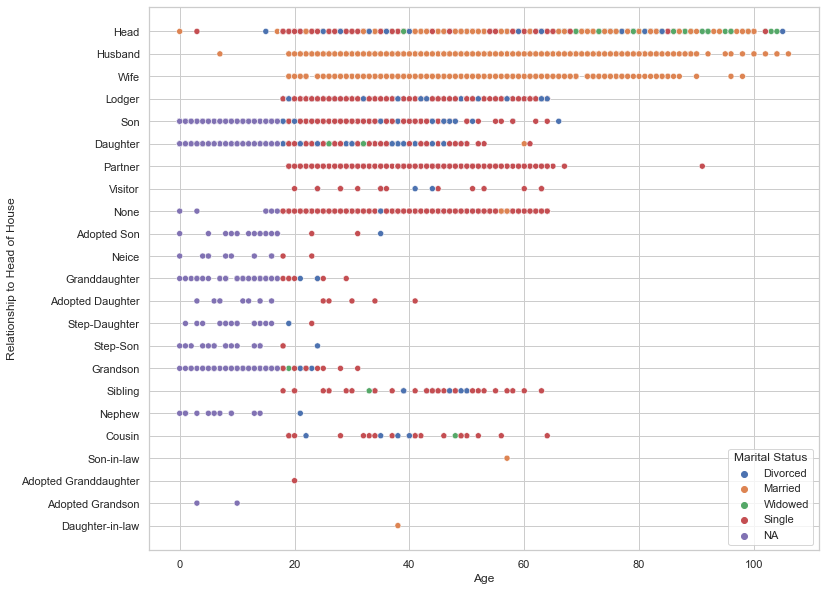

In [96]:
sns.set_style("whitegrid")
Household_Composition = sns.scatterplot(data=Census_df, x='Age', y='Relationship to Head of House', hue = 'Marital Status')
plt.savefig('Household_Composition.png', dpi=200)

# MORE ON DATA CLEANING

In [97]:
Census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 0 to 9385
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   9386 non-null   int32 
 1   Street                         9386 non-null   object
 2   First Name                     9384 non-null   object
 3   Surname                        9386 non-null   object
 4   Age                            9386 non-null   int32 
 5   Relationship to Head of House  9386 non-null   object
 6   Marital Status                 9386 non-null   object
 7   Gender                         9386 non-null   object
 8   Occupation                     9386 non-null   object
 9   Infirmity                      9386 non-null   object
 10  Religion                       9386 non-null   object
dtypes: int32(2), object(9)
memory usage: 733.4+ KB


In [98]:
Married = Census_df[Census_df['Marital Status'] == 'MARRIED']
Married.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [99]:
Single = Census_df[Census_df['Marital Status'] == 'Single']
Single.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,6,Hill Avenue,Adam,Wheeler,52,Head,Single,Male,Research scientist (medical),None,Christian
8,7,Hill Avenue,Ross,Cook,62,Head,Single,Male,Video editor,None,Christian
11,9,Hill Avenue,Nicholas,Powell,44,Head,Single,Male,Metallurgist,None,None
12,10,Hill Avenue,Kirsty,Evans,30,Head,Single,Female,Nature conservation officer,None,Christian
13,11,Hill Avenue,Henry,Phillips,64,Head,Single,Male,Sports development officer,None,Christian


In [100]:
NA = Census_df[Census_df['Marital Status'] == 'NA']
NA.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
53,1,Humphreys Ridges,Carol,Ashton,17,Daughter,NA,Female,Student,None,None
62,4,Humphreys Ridges,Nicole,Russell,14,Daughter,NA,Female,Student,None,None
65,5,Humphreys Ridges,Kate,Walker,4,Daughter,NA,Female,Child,Physical Disability,None
68,6,Humphreys Ridges,Thomas,Ellis,8,Son,NA,Male,Student,None,None
69,6,Humphreys Ridges,Frederick,Ellis,7,Son,NA,Male,Student,None,None


In [101]:
print((Married['Age'] < 18).value_counts())

Series([], Name: Age, dtype: int64)


In [102]:
print((Single['Age'] < 18).value_counts())

False    3266
True        1
Name: Age, dtype: int64


In [103]:
print((NA['Age'] > 17).value_counts())

False    2275
True        2
Name: Age, dtype: int64


In [104]:
print(NA[NA['Age']==18].index.values)

[363]


In [105]:
Census_df['Marital Status'].loc[3914]= 'Single'

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
print(Single[Single['Age']<18].index.values)

[8517]


In [107]:
Census_df.loc[3912:3917]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3912,34,Stone Lane,Natalie,Skinner,36,Head,Married,Female,Unemployed,None,Catholic
3913,34,Stone Lane,Ann,Skinner,38,Wife,Married,Female,Health visitor,None,Catholic
3914,34,Stone Lane,Abigail,Pearson,51,Lodger,Single,Female,Psychotherapist,None,Christian
3915,34,Stone Lane,Katherine,Richardson,29,Lodger,Single,Female,Cytogeneticist,None,Christian
3916,34,Stone Lane,Thomas,Richardson,23,Lodger,Single,Male,"Engineer, materials",None,None
3917,35,Stone Lane,Jeffrey,Gregory,64,Head,Single,Male,Theatre stage manager,None,Christian


In [108]:
Census_df.loc[361:365]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
361,66,Hope Row,Tina,Pearce,64,Head,Married,Female,Art therapist,None,Christian
362,66,Hope Row,Jeremy,Pearce,66,Husband,Married,Male,Actor,None,None
363,66,Hope Row,Janet,Pearce,18,Daughter,NA,Female,Student,None,None
364,66,Hope Row,Lucy,Pearce,15,Daughter,NA,Female,Student,None,None
365,67,Hope Row,Frank,Williams,18,Head,Single,Male,Student,None,None


In [109]:
Census_df['Marital Status'].loc[363]= 'Single'

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
Census_df['Age'].loc[8517]= 30

In [111]:
Census_df.loc[8515:8520]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8515,1,Rhubarb Drive,Leah,Perry,11,Daughter,NA,Female,Student,None,None
8516,1,Rhubarb Drive,Lauren,Perry,3,Daughter,NA,Female,Child,None,None
8517,2,Rhubarb Drive,Bruce,Banks,30,Head,Single,Male,Occupational psychologist,None,None
8518,3,Rhubarb Drive,Emma,Russell,38,Head,Divorced,Female,Sub,None,None
8519,3,Rhubarb Drive,Hayley,Russell,6,Daughter,NA,Female,Student,None,None
8520,3,Rhubarb Drive,Emma,Atkinson,55,Lodger,Single,Female,Clinical cytogeneticist,None,Christian


In [112]:
Census_df.loc[1227:1234]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1227,159,Stokes Plains,Stewart,Turner,36,Husband,Married,Male,Unemployed,None,Christian
1228,159,Stokes Plains,Jade,Turner,12,Daughter,NA,Female,Student,None,None
1229,159,Stokes Plains,Adrian,Turner,11,Son,NA,Male,Student,None,None
1230,160,Stokes Plains,Alison,Williams,17,Head,Married,Female,Student,None,None
1231,160,Stokes Plains,Lawrence,Williams,23,Husband,Married,Male,Sports coach,None,None
1232,160,Stokes Plains,Amelia,Jones,63,Lodger,Widowed,Female,Public relations account executive,None,Christian
1233,161,Stokes Plains,Sophie,Pearce,37,Head,Single,Female,Holiday representative,None,Christian
1234,161,Stokes Plains,Billy,Parkes,40,None,Single,Male,Haematologist,None,None


In [113]:
Census_df['Age'].loc[1230]=18

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
Census_df.loc[1227:1234]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1227,159,Stokes Plains,Stewart,Turner,36,Husband,Married,Male,Unemployed,None,Christian
1228,159,Stokes Plains,Jade,Turner,12,Daughter,NA,Female,Student,None,None
1229,159,Stokes Plains,Adrian,Turner,11,Son,NA,Male,Student,None,None
1230,160,Stokes Plains,Alison,Williams,18,Head,Married,Female,Student,None,None
1231,160,Stokes Plains,Lawrence,Williams,23,Husband,Married,Male,Sports coach,None,None
1232,160,Stokes Plains,Amelia,Jones,63,Lodger,Widowed,Female,Public relations account executive,None,Christian
1233,161,Stokes Plains,Sophie,Pearce,37,Head,Single,Female,Holiday representative,None,Christian
1234,161,Stokes Plains,Billy,Parkes,40,None,Single,Male,Haematologist,None,None


In [115]:
Census_df.loc[3932:3937]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3932,5,Turnbull Hollow,Hilary,Nash,23,None,Single,Female,English as a foreign language teacher,None,None
3933,5,Turnbull Hollow,Kirsty,Morgan,34,None,Single,Female,Haematologist,None,None
3934,6,Turnbull Hollow,Charlotte,Murphy,0,Head,Married,Female,Microbiologist,None,None
3935,6,Turnbull Hollow,Gary,Murphy,51,Husband,Married,Male,"Surveyor, minerals",None,None
3936,6,Turnbull Hollow,Malcolm,Murphy,19,Son,Single,Male,University Student,None,None
3937,6,Turnbull Hollow,Sally,Murphy,15,Daughter,NA,Female,Student,None,None


In [116]:
Census_df['Age'].loc[3934]=50

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
Census_df.loc[3932:3937]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3932,5,Turnbull Hollow,Hilary,Nash,23,None,Single,Female,English as a foreign language teacher,None,None
3933,5,Turnbull Hollow,Kirsty,Morgan,34,None,Single,Female,Haematologist,None,None
3934,6,Turnbull Hollow,Charlotte,Murphy,50,Head,Married,Female,Microbiologist,None,None
3935,6,Turnbull Hollow,Gary,Murphy,51,Husband,Married,Male,"Surveyor, minerals",None,None
3936,6,Turnbull Hollow,Malcolm,Murphy,19,Son,Single,Male,University Student,None,None
3937,6,Turnbull Hollow,Sally,Murphy,15,Daughter,NA,Female,Student,None,None


In [118]:
Census_df.loc[5853:5857]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5853,222,Butcher Drive,Simon,Johnson,47,Husband,Married,Male,"Scientist, forensic",None,Catholic
5854,223,Butcher Drive,Marion,Shaw,70,Head,Married,Female,"Retired Engineer, broadcasting (operations)",None,None
5855,223,Butcher Drive,Damien,Shaw,7,Husband,Married,Male,Retired Advice worker,None,None
5856,224,Butcher Drive,Andrew,Brown,32,Head,Single,Male,Physiological scientist,None,None
5857,225,Butcher Drive,Hayley,Jackson,49,Head,Married,Female,Historic buildings inspector/conservation officer,None,None


In [119]:
Census_df['Age'].loc[5855]= 73

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
Census_df.loc[5853:5857]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5853,222,Butcher Drive,Simon,Johnson,47,Husband,Married,Male,"Scientist, forensic",None,Catholic
5854,223,Butcher Drive,Marion,Shaw,70,Head,Married,Female,"Retired Engineer, broadcasting (operations)",None,None
5855,223,Butcher Drive,Damien,Shaw,73,Husband,Married,Male,Retired Advice worker,None,None
5856,224,Butcher Drive,Andrew,Brown,32,Head,Single,Male,Physiological scientist,None,None
5857,225,Butcher Drive,Hayley,Jackson,49,Head,Married,Female,Historic buildings inspector/conservation officer,None,None


In [121]:
Census_df['Age'].loc[5855]= 73

C:\Users\Simi\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
print((Married['Age'] < 18).value_counts())

Series([], Name: Age, dtype: int64)


In [123]:
Census_df[['Age', 'Relationship to Head of House']]

,Age,Relationship to Head of House
0,70,Head
1,45,Head
2,47,Husband
3,21,Head
4,20,Wife
...,...,...
9381,18,None
9382,55,None
9383,47,None
9384,43,None


In [124]:
Census_df.loc[Census_df['Age']=='0']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [125]:
Census_df["Age"]

0       70
1       45
2       47
3       21
4       20
        ..
9381    18
9382    55
9383    47
9384    43
9385    36
Name: Age, Length: 9386, dtype: int32

In [126]:
Commuters = len (Census_df[Census_df['Occupation'].isin(['University Student', 'PhD Student', 'Higher education lecturer','Further education lecturer','Quarry Manager', 'Farmer', 'Plant breeder', 'Lecturer, higher education', 'Administrator education', 'Outdoor activities/education manger',
                                                        'Educational psychologist', 'Farm Manager', 'Hydrogeologist', 'Geophysicist/field seismologist'])])


In [127]:
Commuters

686

In [128]:
Commuter  = (Census_df[Census_df['Occupation'].isin(['University Student', 'PhD Student', 'Higher education lecturer','Further education lecturer','Quarry Manager', 'Plant breeder', 'Lecturer, higher education', 'Administrator education', 'Outdoor activities/education manger',
                                                        'Educational psychologist', 'Farm Manager', 'Hydrogeologist', 'Geophysicist/field seismologist'])])


In [129]:
Commuter

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3,3,Hill Avenue,Jake,Turner,21,Head,Married,Male,University Student,None,None
4,3,Hill Avenue,Linda,Turner,20,Wife,Married,Female,University Student,None,None
51,1,Humphreys Ridges,Ryan,Ashton,21,Son,Divorced,Male,University Student,None,None
52,1,Humphreys Ridges,Pauline,Ashton,21,Daughter,Divorced,Female,University Student,None,None
56,2,Humphreys Ridges,Shannon,Anderson,20,Visitor,Single,Female,University Student,None,None
...,...,...,...,...,...,...,...,...,...,...,...
9300,28,Smith Lane,Marcus,Harris,22,Head,Married,Male,University Student,None,Christian
9301,28,Smith Lane,Pauline,Harris,20,Wife,Married,Female,University Student,None,None
9349,1,Farmer Rectory,Samantha,Naylor,19,Cousin,Single,Female,University Student,None,Christian
9372,1,Duchess Villa,Julia,Johnson,21,Daughter,Divorced,Female,University Student,None,Sikh


In [130]:
Commuter['Age'].describe()

count    686.000000
mean      22.603499
std        7.487035
min       18.000000
25%       19.000000
50%       21.000000
75%       22.000000
max       67.000000
Name: Age, dtype: float64

# DATA VISUALISATION CONTINUATION

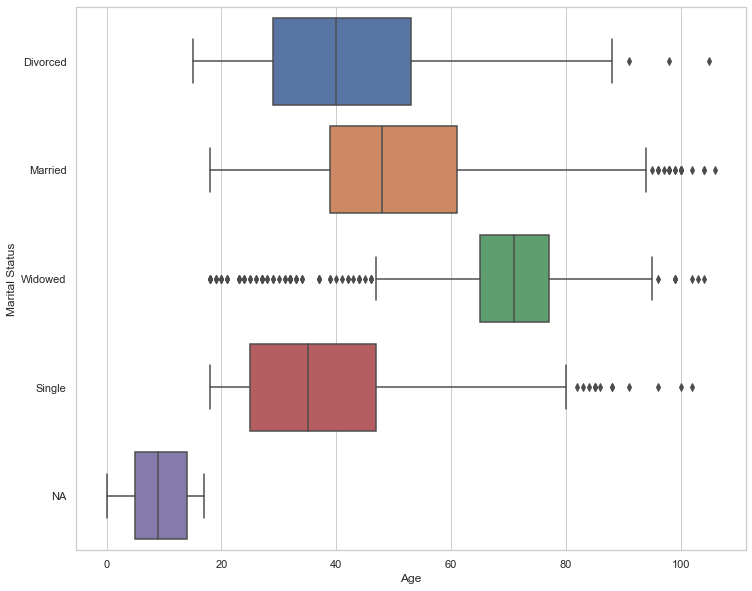

In [131]:
sns.set_style("whitegrid")
sns.boxplot(data=Census_df, x='Age', y='Marital Status')
plt.savefig('Marital Status by Age.png', dpi=400)



In [132]:
male_census_ages = Census_df[Census_df['Gender'] == 'Male']['Age'].to_list()

In [133]:
female_census_ages = Census_df[Census_df['Gender'] =='Female']['Age'].to_list()

In [134]:
age_intervals = []
male_count = []
female_count = []
next_start = 0
for i in range(0,110,5):
    interval = f'{next_start}-{next_start+4}'
    next_start=next_start+4+1
    age_intervals.append(interval)
    male_count.append(0)
    female_count.append(0)

In [135]:
def get_age_group(age):
    index = int(age/5)
    return age_intervals[index]

In [136]:
Census_df['age_group'] = Census_df['Age'].apply(get_age_group)

In [137]:
for age in male_census_ages:
    index = int(age/5)
    male_count[index] = male_count[index] + 1

In [138]:
for age in female_census_ages:
    index = int(age/5)
    female_count[index] = female_count[index] + 1

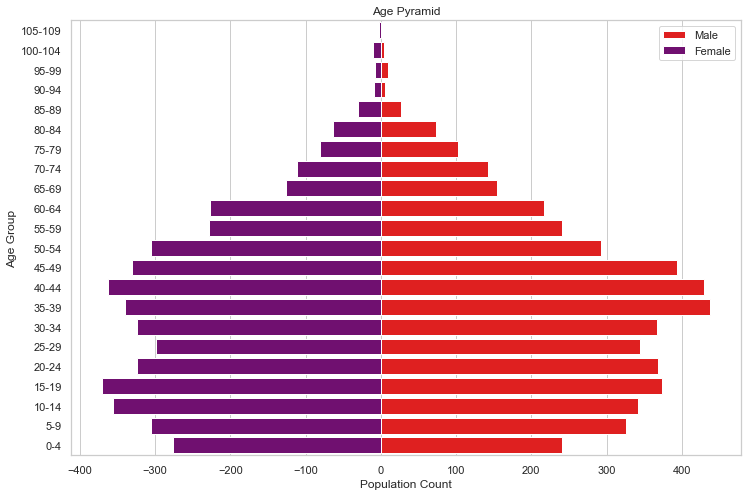

In [139]:
age_pyramid_df = pd.DataFrame({
    'Age' : age_intervals,
    'Male' : female_count,
    'Female' : [-1 * val for val in male_count]
})
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
age_pyramid = sns.barplot(x='Male', y='Age', data=age_pyramid_df, order=reversed(age_intervals), color=('red'), label='Male')
age_pyramid = sns.barplot(x='Female', y='Age', data=age_pyramid_df, order=reversed(age_intervals), color=('purple'), label='Female')
age_pyramid.legend() 
plt.title('Age Pyramid')
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')
plt.savefig('age_pyramid.png', dpi=300)

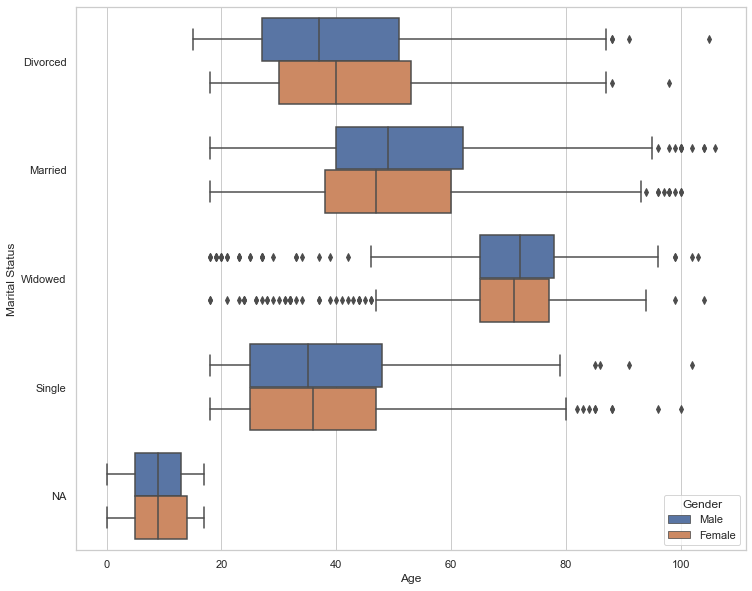

In [140]:
sns.boxplot(data=Census_df, x='Age', y= 'Marital Status', hue = 'Gender')
plt.savefig('Marital Status by Age')

In [141]:
#Umployed with the retired group
Unemployed_df = Census_df[Census_df.Occupation == 'Unemployed']

Unemployed_df


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
27,21,Hill Avenue,Jodie,Miller,55,Head,Single,Female,Unemployed,None,Christian,55-59
57,2,Humphreys Ridges,Gemma,Robertson,30,Lodger,Single,Female,Unemployed,Physical Disability,None,30-34
60,3,Humphreys Ridges,Guy,Potter,40,Son,Single,Male,Unemployed,None,None,40-44
61,4,Humphreys Ridges,Louise,Ali,33,Head,Single,Female,Unemployed,None,None,30-34
63,5,Humphreys Ridges,Debra,Walker,39,Head,Married,Female,Unemployed,None,Christian,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
9343,1,Farmer Rectory,Wendy,Arnold,33,Head,Single,Female,Unemployed,None,None,30-34
9355,1,Goldfinch Fort,Charlie,Marshall,40,Lodger,Single,Male,Unemployed,None,Catholic,40-44
9358,1,England Windmill,Connor,James,46,Partner,Single,Male,Unemployed,None,Catholic,45-49
9361,1,Norwich Cabin,Jay,Johnson,32,Partner,Single,Male,Unemployed,None,None,30-34


In [142]:
#Unemployed without the retired group
New_Unemployed = Unemployed_df.drop(Unemployed_df[Unemployed_df['Age'] > 65].index)

In [143]:
New_Unemployed

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
27,21,Hill Avenue,Jodie,Miller,55,Head,Single,Female,Unemployed,None,Christian,55-59
57,2,Humphreys Ridges,Gemma,Robertson,30,Lodger,Single,Female,Unemployed,Physical Disability,None,30-34
60,3,Humphreys Ridges,Guy,Potter,40,Son,Single,Male,Unemployed,None,None,40-44
61,4,Humphreys Ridges,Louise,Ali,33,Head,Single,Female,Unemployed,None,None,30-34
63,5,Humphreys Ridges,Debra,Walker,39,Head,Married,Female,Unemployed,None,Christian,35-39
...,...,...,...,...,...,...,...,...,...,...,...,...
9343,1,Farmer Rectory,Wendy,Arnold,33,Head,Single,Female,Unemployed,None,None,30-34
9355,1,Goldfinch Fort,Charlie,Marshall,40,Lodger,Single,Male,Unemployed,None,Catholic,40-44
9358,1,England Windmill,Connor,James,46,Partner,Single,Male,Unemployed,None,Catholic,45-49
9361,1,Norwich Cabin,Jay,Johnson,32,Partner,Single,Male,Unemployed,None,None,30-34


In [144]:
Retired= Census_df[(Census_df['Age'] >=65)] 
Retired

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
0,1,Hill Avenue,Eric,Farmer,70,Head,Divorced,Male,Retired Computer games developer,None,None,70-74
6,5,Hill Avenue,Jonathan,Phillips,73,Head,Widowed,Male,Retired Air broker,None,None,70-74
9,8,Hill Avenue,Gemma,Chandler,71,Head,Married,Female,Retired Chartered certified accountant,None,Christian,70-74
10,8,Hill Avenue,Phillip,Chandler,73,Husband,Married,Male,Retired Geoscientist,None,Christian,70-74
19,14,Hill Avenue,Denis,Woods,88,Head,Divorced,Male,Retired Learning mentor,None,Christian,85-89
...,...,...,...,...,...,...,...,...,...,...,...,...
9296,26,Smith Lane,Danielle,Turner,69,Head,Widowed,Female,Retired Banker,None,Christian,65-69
9302,29,Smith Lane,Roy,King,65,Head,Single,Male,Sports administrator,None,Christian,65-69
9312,5,Albion Lane,Howard,Connolly,78,Head,Married,Male,Retired Civil Service fast streamer,None,Christian,75-79
9313,5,Albion Lane,Anna,Connolly,74,Wife,Married,Female,Retired Hydrogeologist,None,None,70-74


In [145]:
#with the retired group
New_Unemployed['Age'].describe()

count    578.000000
mean      42.342561
std       10.687151
min       19.000000
25%       34.000000
50%       42.000000
75%       50.000000
max       65.000000
Name: Age, dtype: float64

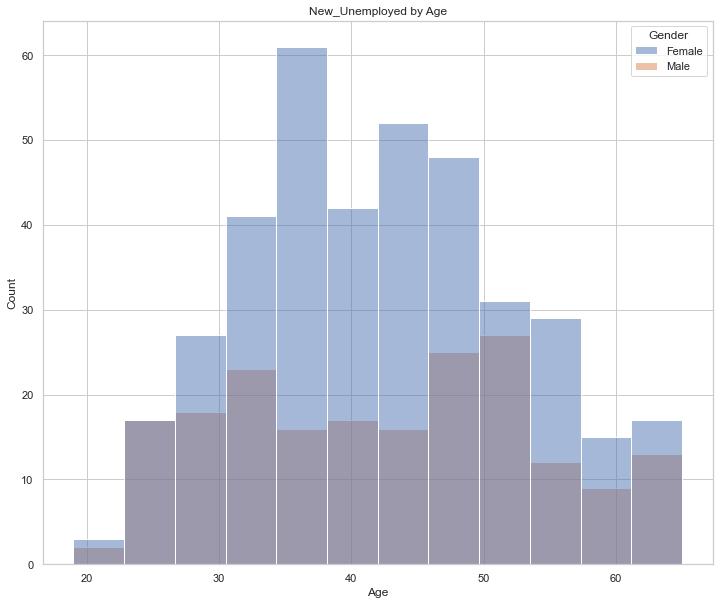

In [146]:
sns.set_style('whitegrid')
sns.histplot(data= New_Unemployed, x='Age', color = 'red',  hue = 'Gender').set(title='New_Unemployed by Age')

plt.savefig('Unemployed by Age')

In [147]:
Student_df = Census_df[Census_df.Occupation == 'Student']


In [148]:
Student_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
53,1,Humphreys Ridges,Carol,Ashton,17,Daughter,NA,Female,Student,None,None,15-19
62,4,Humphreys Ridges,Nicole,Russell,14,Daughter,NA,Female,Student,None,None,10-14
68,6,Humphreys Ridges,Thomas,Ellis,8,Son,NA,Male,Student,None,None,5-9
69,6,Humphreys Ridges,Frederick,Ellis,7,Son,NA,Male,Student,None,None,5-9
74,7,Humphreys Ridges,Trevor,Campbell,12,Son,NA,Male,Student,None,None,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...
9373,1,Duchess Villa,Hayley,Johnson,17,Daughter,NA,Female,Student,None,None,15-19
9374,1,Duchess Villa,Lewis,Johnson,15,Son,NA,Male,Student,None,None,15-19
9376,1,Guinevere Abbey,Jay,Clark,9,Son,NA,Male,Student,None,None,5-9
9377,1,Guinevere Abbey,Josh,Clark,8,Son,NA,Male,Student,None,None,5-9


In [149]:
Census_df['Age'].max()

106

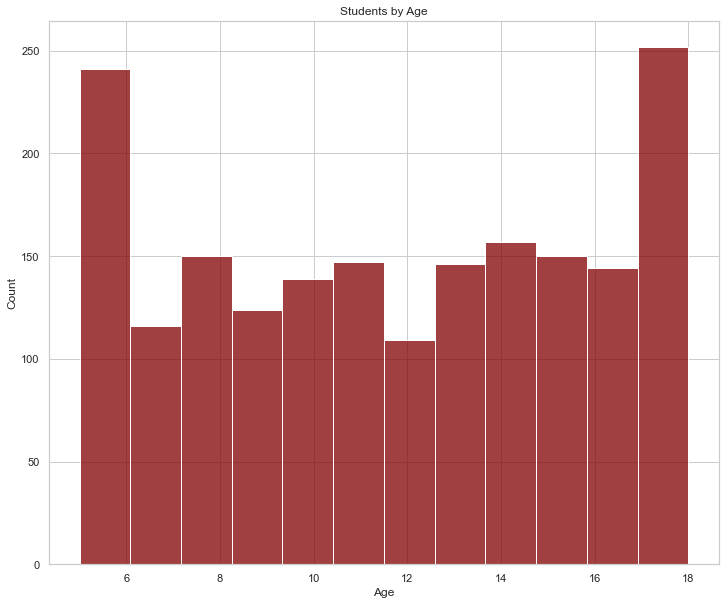

In [150]:
sns.set_style('whitegrid')
sns.histplot(data= Student_df, x='Age', color = 'maroon').set(title='Students by Age')
plt.savefig('Students by Age')

In [151]:
Student_df['Age'].describe()

count    1875.000000
mean       11.634133
std         3.945535
min         5.000000
25%         8.000000
50%        12.000000
75%        15.000000
max        18.000000
Name: Age, dtype: float64

In [152]:
UniversityStudent_df = Census_df[Census_df.Occupation == 'University Student']

UniversityStudent_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
3,3,Hill Avenue,Jake,Turner,21,Head,Married,Male,University Student,None,None,20-24
4,3,Hill Avenue,Linda,Turner,20,Wife,Married,Female,University Student,None,None,20-24
51,1,Humphreys Ridges,Ryan,Ashton,21,Son,Divorced,Male,University Student,None,None,20-24
52,1,Humphreys Ridges,Pauline,Ashton,21,Daughter,Divorced,Female,University Student,None,None,20-24
56,2,Humphreys Ridges,Shannon,Anderson,20,Visitor,Single,Female,University Student,None,None,20-24
...,...,...,...,...,...,...,...,...,...,...,...,...
9300,28,Smith Lane,Marcus,Harris,22,Head,Married,Male,University Student,None,Christian,20-24
9301,28,Smith Lane,Pauline,Harris,20,Wife,Married,Female,University Student,None,None,20-24
9349,1,Farmer Rectory,Samantha,Naylor,19,Cousin,Single,Female,University Student,None,Christian,15-19
9372,1,Duchess Villa,Julia,Johnson,21,Daughter,Divorced,Female,University Student,None,Sikh,20-24


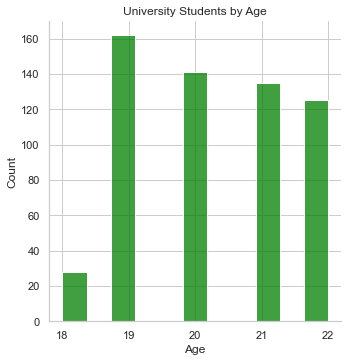

In [153]:
sns.set_style('whitegrid')
sns.displot(data= UniversityStudent_df, x='Age', color = 'green').set(title='University Students by Age')
plt.savefig('University Students by Age')

In [154]:
UniversityStudent_df['Age'].describe()


count    591.000000
mean      20.282572
std        1.208592
min       18.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       22.000000
Name: Age, dtype: float64

In [155]:
Child_df= Census_df[Census_df.Occupation == 'Child']

Child_df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,age_group
65,5,Humphreys Ridges,Kate,Walker,4,Daughter,NA,Female,Child,Physical Disability,None,0-4
70,6,Humphreys Ridges,Nigel,Ellis,4,Son,NA,Male,Child,None,None,0-4
84,10,Humphreys Ridges,Rebecca,Bailey,1,Daughter,NA,Female,Child,None,None,0-4
105,8,Coconut Forges,Kenneth,Wilkinson,2,Son,NA,Male,Child,None,None,0-4
118,2,Hope Row,Linda,Payne,3,Daughter,NA,Female,Child,None,None,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...
9346,1,Farmer Rectory,Bernard,Arnold,2,Son,NA,Male,Child,None,None,0-4
9347,1,Farmer Rectory,Stewart,Arnold,0,Son,NA,Male,Child,None,None,0-4
9352,1,Goldfinch Fort,Gerard,Kelly,2,Son,NA,Male,Child,None,None,0-4
9362,1,Norwich Cabin,Suzanne,Khan,1,Daughter,NA,Female,Child,None,None,0-4


In [156]:
Child_df['Age'].describe()

count    517.000000
mean       2.185687
std        1.356990
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Age, dtype: float64

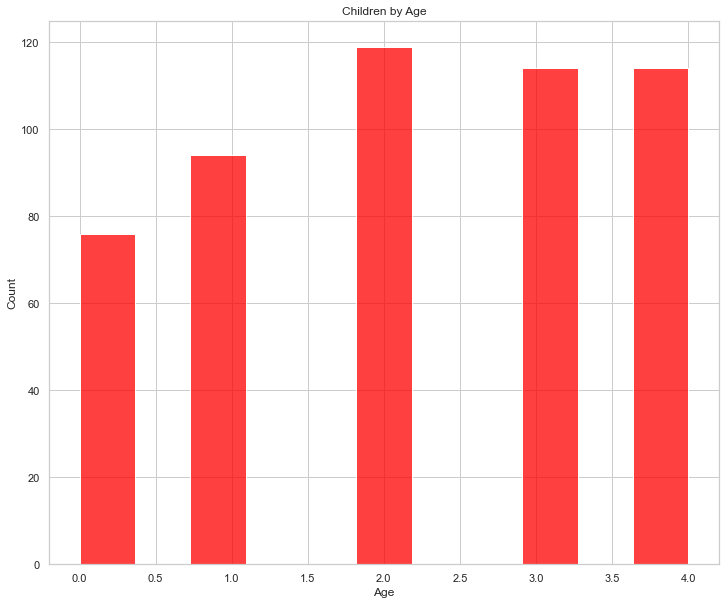

In [157]:
sns.set_style('whitegrid')
sns.histplot(data= Child_df, x='Age', color = 'red').set(title='Children by Age')
plt.savefig('Children')

In [158]:
Phd_Student = Census_df[Census_df.Occupation == 'PhD Student']

In [159]:
Phd_Student.describe()

,House Number,Age
count,31.000000,31.000000
mean,47.096774,27.258065
std,60.563110,2.816236
min,1.000000,23.000000
25%,9.500000,25.000000
50%,14.000000,26.000000
75%,60.500000,30.000000
max,215.000000,32.000000


In [160]:
Total_population = len(Census_df)


In [161]:
print(Total_population)

9386


# CRUDE BIRTH RATE

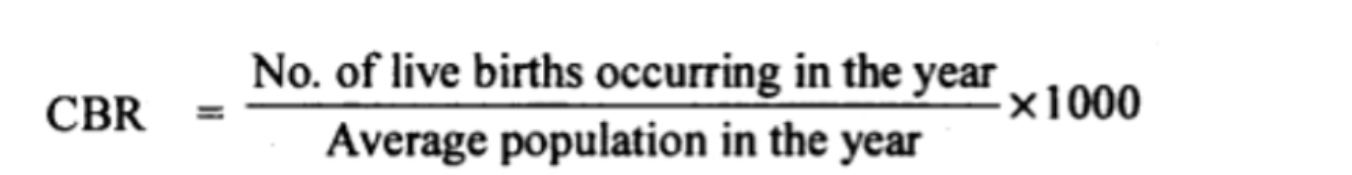

In [162]:
#In this case I will be using per 100,000
Births = len(Census_df[Census_df['Age'] == 0])
Birthrate = (Births/Total_population)*1000
Birthrate

8.097165991902834

In [163]:
# same method - different filtering... (by variable)

babies0 = Census_df['Age'] == 0
babies4 = Census_df['Age'] == 4
babies8 = Census_df['Age'] == 8
CrudeBirth = (len(Census_df[babies0])/totalpopulation)*1000

CrudeBirth4year = (len(Census_df[babies4])/len(Census_df))*1000

print(f"Present Crude Birthrate per 1000: {CrudeBirth}")
print(f"Previous Crude Birthrate per 1000: {CrudeBirth4year}")



print(f"Present CBR Change from Previous per 1000: {CrudeBirth-CrudeBirth4year}")

NameError: name 'totalpopulation' is not defined

In [ ]:
babies4.describe() 

In [ ]:
BIRTHS1 = len(Census_df[Census_df['Age'] == 0])
AGE1= (Census_df['Age'].between(25,29)) & (Census_df['Gender'] == 'Female')
AGE1 = len(Census_df[AGE1])

print((BIRTHS1/AGE1)*1000)

# AGE SPECIFIC FERTILITY RATE

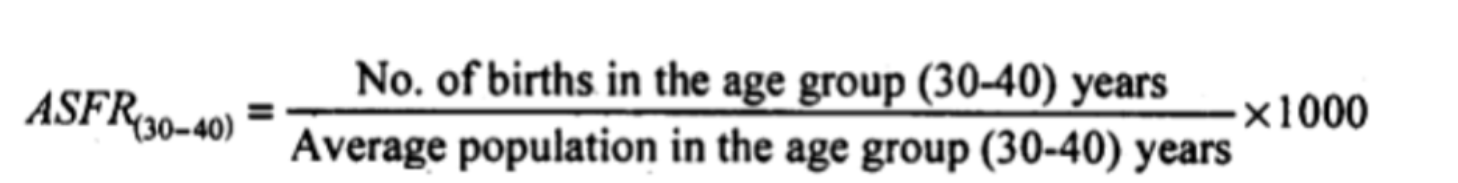

In [ ]:
# define women of childbearing age, corresponding to above year gaps
#in this case I will be using per 100,000

AGE1 = (Census_df['Age'].between(25,29)) & (Census_df['Gender'] == 'Female')
AGE2 = (Census_df['Age'].between(30,34)) & (Census_df['Gender'] == 'Female')
AGE3 = (Census_df['Age'].between(35,39)) & (Census_df['Gender'] == 'Female')

# calculate age-specific fertility rate

ASFR1 = (len(Census_df[babies0])/len(Census_df[AGE1]))*1000
ASFR2= (len(Census_df[babies4])/len(Census_df[AGE2]))*1000
ASFR3 = (len(Census_df[babies8])/len(Census_df[AGE3]))*1000

print(f"ASFR 25-29 per 1000 is {ASFR1}")
print(f"ASFR 30-34 per 1000 is {ASFR2}")
print(f"ASFR 35-40 per 1000 is {ASFR3}")

# GENERAL FERTILITY RATE

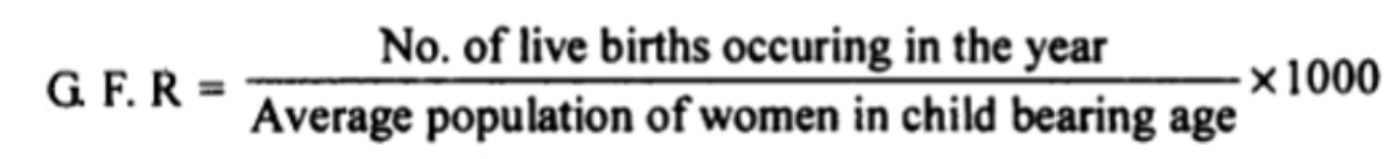

In [ ]:
Totalbirths = len(Census_df[babies0]) +  len(Census_df[babies4]) + len(Census_df[babies8])
Cbage = len(Census_df[AGE1])+ len(Census_df[AGE2])+len(Census_df[AGE2])

GFR = Totalbirths/Cbage

print(f"General Fertility Rate: {GFR*1000}")

# CRUDE DEATH RATE

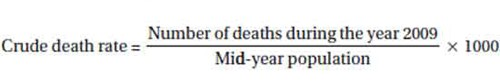

In [ ]:
Agingpop = Census_df[Census_df['Age'].between(65,99)].groupby('Age').size().sort_index(ascending=False)
Agingpop

In [ ]:
# shift the ages up one to mimic last year's 'counts' per age

AgesCalculated = Agingpop.shift(-1)
AgesCalculated

In [ ]:
# calculate the difference between our two sets

Diff = Agingpop - AgesCalculated

# change it to a dataframe...

Diff = Diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

Deaths = Diff[Diff['Count'] < 0]
Deaths

In [ ]:
Deathrate = abs(((Deaths['Count']).sum())/Total_population)*1000
Deathrate

# Crude Growth Rate

In [ ]:
#Crude Birth Rate - Crude Death Rate = Crude Growth Rate
#Division by ten for percentage
print(f"CGR {CrudeBirth - Deathrate}")
print(f"CGR as Percentage {(CrudeBirth-Deathrate)/10}%")

# Population Change

In [ ]:
#(birth rate + immigration rate) - (death rate + emigration rate) = population change

In [ ]:
Immigration_count = len(Visitors) + len (Lodgers)
Immigration_count

In [ ]:
Immigration_rate = Immigration_count/Total_population *1000
Immigration_rate

In [ ]:
Emigration_count = len(Divorcees) + len(UniversityStudent_df)
Emigration_count

In [ ]:
Emigration_rate = Emigration_count/Total_population *1000
Emigration_rate

In [ ]:
Population_Change = (CrudeBirth + Immigration_rate) - (Deathrate + Emigration_rate)

In [ ]:
Population_Change

In [ ]:
#Crude immigration and emigration rates can be calculated using the same method of other crude rates - count the number of potential emigrants/immigrants and divide by the total population, * 1000 to get the crude rate.

In [ ]:

HouseholdDetails = Census_df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
HouseholdDetails

In [ ]:
HouseholdDetails.describe()

In [ ]:
HouseholdDetails.median()

In [ ]:
HouseholdDetails.head(30)

In [ ]:
HouseHoldHigherthan7= HouseholdDetails.loc[HouseholdDetails['Occupancy Count'] > 7]

In [ ]:
HouseHoldHigherthan7.count()

In [ ]:
Divorcees.describe()